<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size)
        self.gat2 = GATConv(emb_size, emb_size)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [4]:
models = train_all_and_optimize(GAT, datasets, epochs = 60)

[I 2022-01-05 00:52:14,864] A new study created in memory with name: no-name-d946a68a-7250-4120-bc5a-5a8d270d9725


--> Train on: origin


[I 2022-01-05 00:53:16,573] Trial 0 finished with value: 0.9108455882352942 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.9108455882352942.
[I 2022-01-05 00:53:41,223] Trial 1 finished with value: 0.8708639705882353 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.9108455882352942.
[I 2022-01-05 00:54:02,416] Trial 2 finished with value: 0.9011948529411764 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.9108455882352942.
[I 2022-01-05 00:54:26,423] Trial 3 finished with value: 0.9168198529411764 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 3 with value: 0.9168198529411764.
[I 2022-01-05 00:54:42,789] Trial 4 finished with value: 0.90

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.22597023844718933  loss_val=0.27654620707035066 | acc_train=0.9052287581699345  acc_val=0.8940257352941176
Epochs: 20 | loss_train=0.1821997579601076  loss_val=0.21973201334476472 | acc_train=0.9366319444444444  acc_val=0.9108455882352942
Epochs: 30 | loss_train=0.16019131077660453  loss_val=0.1677120491862297 | acc_train=0.9490910947712418  acc_val=0.940625
Epochs: 40 | loss_train=0.14095096704032686  loss_val=0.18719588816165925 | acc_train=0.9534313725490196  acc_val=0.9292279411764707
Epochs: 50 | loss_train=0.1330685309237904  loss_val=0.20086857974529265 | acc_train=0.9541973039215687  acc_val=0.9229779411764707
Epochs: 60 | loss_train=0.12358623080783421  loss_val=0.1805422842502594 | acc_train=0.9595077614379084  acc_val=0.9378676470588235


[I 2022-01-05 00:57:02,562] A new study created in memory with name: no-name-8e59ba5c-1ec2-4fd6-9843-8b169cb8b6e3


--> Train on: dataset1


[I 2022-01-05 00:57:31,999] Trial 0 finished with value: 0.8376034007352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 160}. Best is trial 0 with value: 0.8376034007352942.
[I 2022-01-05 00:57:56,147] Trial 1 finished with value: 0.8546262254901961 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8546262254901961.
[I 2022-01-05 00:58:25,434] Trial 2 finished with value: 0.8970588235294118 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 2 with value: 0.8970588235294118.
[I 2022-01-05 00:58:52,514] Trial 3 finished with value: 0.8547028186274509 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.8970588235294118.
[I 2022-01-05 00:59:24,892] Trial 4 finished with value: 0

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.9000474512577057  loss_val=1.0627299745877583 | acc_train=0.7461397058823529  acc_val=0.7593443627450981
Epochs: 20 | loss_train=0.6273583590984344  loss_val=0.3834242026011149 | acc_train=0.7817095588235294  acc_val=0.8546262254901961
Epochs: 30 | loss_train=0.49727091789245603  loss_val=0.3860531548659007 | acc_train=0.8200827205882353  acc_val=0.8794424019607843
Epochs: 40 | loss_train=0.4032848298549652  loss_val=0.6169209579626719 | acc_train=0.8659007352941176  acc_val=0.8722426470588235
Epochs: 50 | loss_train=0.24159519076347352  loss_val=0.44218401114145917 | acc_train=0.9071691176470589  acc_val=0.8807444852941176
Epochs: 60 | loss_train=0.7347332835197449  loss_val=0.3229324221611023 | acc_train=0.8205882352941176  acc_val=0.8872549019607843


[I 2022-01-05 01:02:21,357] A new study created in memory with name: no-name-2f7afcbd-f50e-4325-9ac8-48889f26fc48


--> Train on: dataset2


[I 2022-01-05 01:02:44,173] Trial 0 finished with value: 0.8693933823529412 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8693933823529412.
[I 2022-01-05 01:03:08,070] Trial 1 finished with value: 0.8678308823529411 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8693933823529412.
[I 2022-01-05 01:03:34,474] Trial 2 finished with value: 0.9074754901960785 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 2 with value: 0.9074754901960785.
[I 2022-01-05 01:04:02,966] Trial 3 finished with value: 0.8473115808823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.9074754901960785.
[I 2022-01-05 01:04:19,512] Trial 4 finished with value: 0.8

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.4016336858272552  loss_val=0.3656609157721202 | acc_train=0.8222886029411764  acc_val=0.8370098039215685
Epochs: 20 | loss_train=0.35299864411354065  loss_val=0.28887978196144104 | acc_train=0.8584558823529411  acc_val=0.8755361519607843
Epochs: 30 | loss_train=0.3911149263381958  loss_val=0.5050088862578074 | acc_train=0.8483455882352942  acc_val=0.8357077205882352
Epochs: 40 | loss_train=0.27650840282440187  loss_val=0.3051425814628601 | acc_train=0.8913143382352942  acc_val=0.8656556372549019
Epochs: 50 | loss_train=0.2386676549911499  loss_val=0.2748518188794454 | acc_train=0.9095128676470589  acc_val=0.8793658088235294
Epochs: 60 | loss_train=0.2685034215450287  loss_val=0.21886040270328522 | acc_train=0.8916819852941176  acc_val=0.9074754901960785


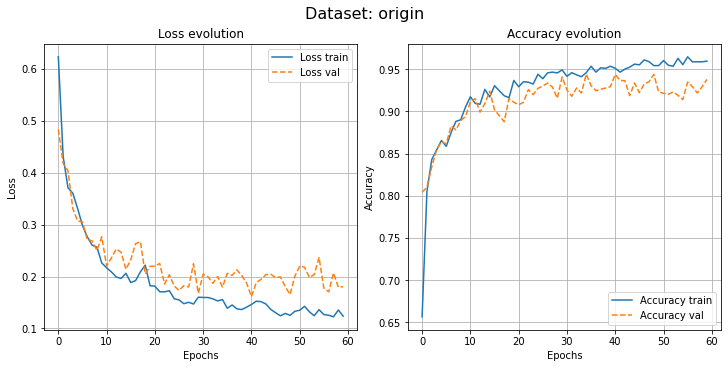

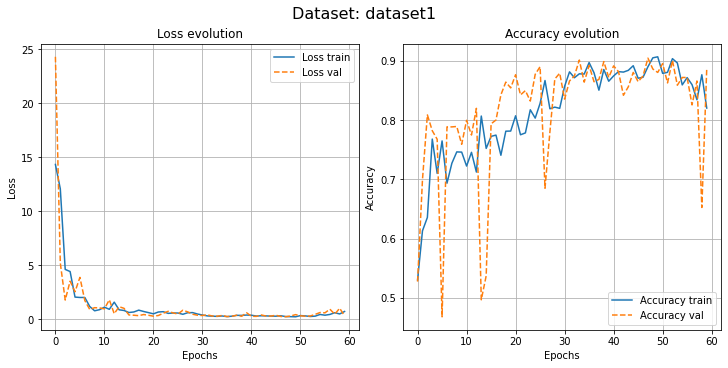

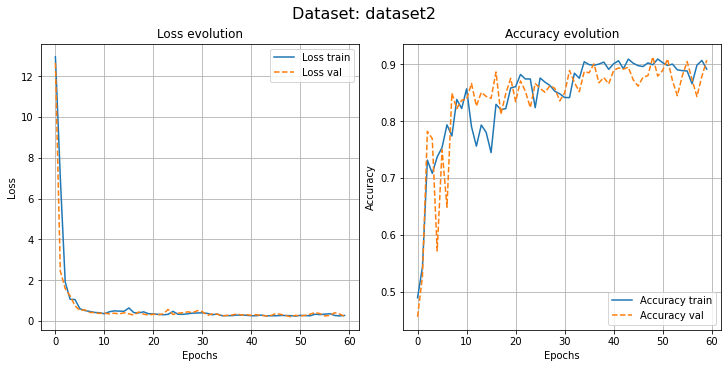

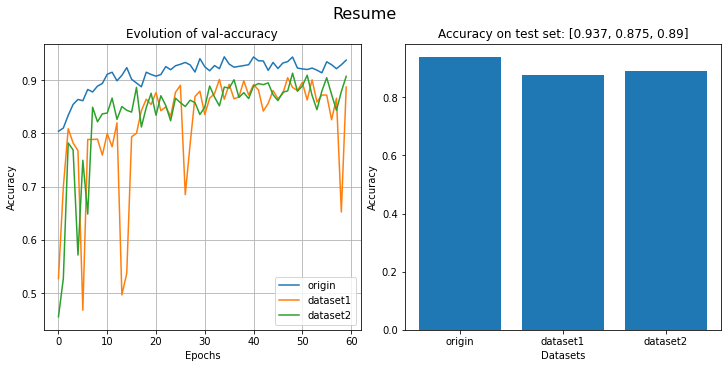

In [5]:
plot_hist(models)

# Save the three models

In [6]:
path = '../models/GAT/'
for name, model, _, _ in models:
    torch.save(model, f'{path}GAT_{name}')